# SI 618: Natural Language Processing Part 2

# Outline for today
- ```Word2Vec```
    - Vector representation of words
    - Word similarities
    - Vector algebra for semantics
- ```Sentiment Analysis```
    - determining if text is positive, negative, or neutral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Word embedding

- So far, we seen how we can extract some interesting syntactic characteristics from text from using ```spaCy```
- It extracted the characteristics, but did not indicate what it means
- Can machines understand semantic relationship between words?

- Distributional semantics
    - Representing semantic information of words in a geometric semantic space
        - Different relationship between words: explained by geometric relationship between words 
        - e.g., Related words are located closer to each other; 
    - And it's often called as *word embedding*

#### Word2Vec
- Developed by [Mikolov et al., 2013](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)
- Represent the meaning of the words as a vector
    - Vector: numeric array
    - Output of a neural network model that predicts the next word
- Surprisingly, many different semantic informations can be represented from word vectors of ```Word2Vec```
- (More explanation in here: https://www.tensorflow.org/tutorials/representation/word2vec)

<img src="https://www.tensorflow.org/images/softmax-nplm.png" width="400">

![](https://www.tensorflow.org/images/linear-relationships.png)

## OK. Let's try some more details in our local machines!
- Download the [pretrained model](https://drive.google.com/open?id=10GXpuviDJVa-k8ZmiYX3BVABNDRaA6tg)
- We are using [gensim](https://radimrehurek.com/gensim/) package this time (you might have to install it by uncommenting and running the next cell).

In [3]:
! pip3 install gensim

     |████████████████████████████████| 24.2 MB 7.7 MB/s eta 0:00:01


In [4]:
import gensim

Change the filepath in the next cell to correspond to the location of the pretrained model file you downloaded above.

In [6]:
w2v_mod = gensim.models.KeyedVectors.load_word2vec_format("~/Desktop/GoogleNews-vectors-negative300-SLIM.bin", binary=True)

## 1-1. Calculating similarity between words

- Q: What's similarity between *school* and *student*?

- the word vector for *school* looks like this:

In [7]:
w2v_mod['school']

array([ 3.70471478e-02,  1.14410305e-02,  1.49575379e-02,  8.87546614e-02,
        3.96226160e-02, -2.67452672e-02,  6.33961856e-02, -1.90188568e-02,
       -1.89445645e-03, -3.68490331e-02,  1.01037674e-01,  1.85235739e-02,
        2.69433800e-02, -4.00188453e-02, -4.29905392e-02,  4.31886539e-02,
       -8.12263638e-02,  5.72051527e-03,  5.54716662e-02, -3.56603563e-02,
        8.32074955e-02,  6.93395808e-02,  4.72994987e-03,  6.97358102e-02,
        1.96874887e-03, -1.41848966e-01,  9.22464067e-04,  7.48867467e-02,
        4.85377051e-02, -1.02028241e-02,  4.14056368e-02, -4.33867648e-02,
        1.62452739e-02,  3.04598873e-03, -6.61697686e-02, -6.06226064e-02,
        9.27169248e-02, -2.04056483e-02,  1.88207440e-02,  5.07169515e-02,
        5.29952534e-03,  5.19056283e-02,  4.47735563e-02, -2.05047056e-02,
        1.39669729e-02,  5.86414747e-02,  6.97358102e-02, -1.12924464e-02,
       -4.49716710e-02,  9.31131542e-02, -4.75471430e-02, -4.95282710e-02,
       -1.44251098e-03, -

In [8]:
len(w2v_mod['school'])

300

- and the word vector for *student* looks like this:

In [9]:
w2v_mod['student']

array([ 0.01336551,  0.00730235,  0.08037006,  0.05629445,  0.06479172,
        0.01141821,  0.11400511, -0.01221483,  0.0559404 , -0.1359564 ,
        0.01849928, -0.04779717, -0.04337151, -0.05027555, -0.0073466 ,
        0.00477972, -0.02442967, -0.02389859, -0.00907261, -0.05098365,
        0.00783343,  0.06302146, -0.00064449, -0.03328099, -0.03540531,
       -0.17844278, -0.04956744, -0.002069  ,  0.06160524,  0.0366445 ,
        0.03416613, -0.03983098, -0.03080262,  0.01964995, -0.02372156,
       -0.00610742,  0.04071611,  0.0506296 , -0.03009452,  0.08072411,
       -0.08638897,  0.0426634 , -0.01672901,  0.03115668,  0.0619593 ,
       -0.02496075,  0.01451618, -0.03752963,  0.05771066,  0.0179682 ,
       -0.03947692, -0.05452418,  0.0054657 , -0.01964995,  0.0906376 ,
       -0.03452018, -0.04284043,  0.04036206,  0.07435116, -0.03629045,
        0.00610742, -0.03452018, -0.00111748, -0.00489036,  0.03363505,
       -0.0306256 ,  0.03080262, -0.02009252,  0.05735661,  0.03

- the similarity between two word vectors is:

In [10]:
w2v_mod.similarity('school', 'student')

0.60556275

### Methods for measuring similarity

<table>
<tr>
    <td><img src="https://nickgrattan.files.wordpress.com/2014/06/screenhunter_76-jun-10-08-36.jpg" width="400"></td>
    <td><img src="https://nickgrattan.files.wordpress.com/2014/06/screenhunter_77-jun-10-08-36.jpg" width="400"></td>
    <td><img src="https://nickgrattan.files.wordpress.com/2014/06/screenhunter_77-jun-10-08-37.jpg" width="400"></td>
</tr>
</table>

- Euclidean distance
    - The most common use of distance
    - $ \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2} $

In [11]:
# (images from https://nickgrattan.wordpress.com/2014/06/10/euclidean-manhattan-and-cosine-distance-measures-in-c/)
np.sqrt(np.power((12-5), 2) + np.power((14-11), 2))

7.615773105863909

- Manhattan distance
    - Distance = the sum of differences in the grid
    - $|x_1 - x_2| + |y_1 - y_2|$

In [12]:
np.abs(12-5) + np.abs(14-11)

10

- Cosine similarity 
    - Often used to measure similarity between vectors
    - $cos(\theta) = \frac{\sum_{i=1}^{n} A_i B_i }{\sqrt{\sum_{i=1}^{n} A_i^2 } \sqrt{\sum_{i=1}^{n} B_i^2 }}$ 
    - https://en.wikipedia.org/wiki/Cosine_similarity

In [13]:
a = np.array([12, 14])
b = np.array([5, 11])
a.dot(b) / (np.sqrt(np.sum(np.power(a, 2))) * np.sqrt(np.sum(np.power(b, 2))))

0.9605011450474118

In [ ]:
# (image from http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/)

![](http://blog.christianperone.com/wp-content/uploads/2013/09/cosinesimilarityfq1.png)

- Cosine simiarity can go from -1 to 1
- But usually, we deal with 0 to 1 scores for comparing words in ```Word2Vec```

## 1-2. Analogy from word vectors

<img src="https://www.tensorflow.org/images/linear-relationships.png" width="800">

#### Can we approximate the relationship between words by doing - and + operations?

- $woman - man + king \approx ?$
- How this works?
    - $woman:man \approx x:king $
    - $\rightarrow woman - man \approx x - king $
    - $\rightarrow woman - man + king \approx x$
    - List top-10 words ($x$) that can solve the equation!

In [14]:
w2v_mod.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431607246399),
 ('prince', 0.5377322435379028),
 ('kings', 0.5236844420433044),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454),
 ('throne', 0.5005807280540466),
 ('royal', 0.4938204884529114)]

- $Spain - Germany + Berlin \approx ?$
    - $\rightarrow Spain - Germany \approx x -  Berlin $

In [15]:
w2v_mod.most_similar(positive=['Spain', 'Berlin'], negative=['Germany'])

[('Madrid', 0.717348039150238),
 ('Barcelona', 0.5742595791816711),
 ('Malaga', 0.5547429323196411),
 ('Bilbao', 0.5404423475265503),
 ('Lisbon', 0.5366039276123047),
 ('Seville', 0.5312415361404419),
 ('Paris', 0.5251091718673706),
 ('Catalan', 0.5213973522186279),
 ('Rome', 0.5174577832221985),
 ('Bogota', 0.5146557688713074)]

## 1-3. Constructing the interpretable semantic scales 

- So far, we saw that word vectors effectively carries (although not perfect) the semantic information.
- Can we design something more interpretable results from using the semantic space?

- Let's re-try with real datapoints in [here](https://projector.tensorflow.org): *politics* words in a *bad-good* PCA space

In [16]:
from scipy import spatial
 
def cosine_similarity(x, y):
    return(1 - spatial.distance.cosine(x, y))

- Can we regenerate this results with our embedding model?

### Let's plot words in the 2D space
- Using Bad & Good axes
- Calculate cosine similarity between an evaluating word (violence, discussion, and issues) with each scale's end (bad, and good)

In [17]:
pol_words_sim_2d = pd.DataFrame([[cosine_similarity(w2v_mod['violence'], w2v_mod['good']), cosine_similarity(w2v_mod['violence'], w2v_mod['bad'])],
                                 [cosine_similarity(w2v_mod['discussion'], w2v_mod['good']), cosine_similarity(w2v_mod['discussion'], w2v_mod['bad'])],
                                 [cosine_similarity(w2v_mod['issues'], w2v_mod['good']), cosine_similarity(w2v_mod['issues'], w2v_mod['bad'])]],
                                index=['violence', 'discussion', 'issues'], columns=['good', 'bad'])

In [18]:
pol_words_sim_2d

,good,bad
violence,-0.016942,0.091223
discussion,0.045935,-0.007224
issues,0.139897,0.118816


- If we plot this:

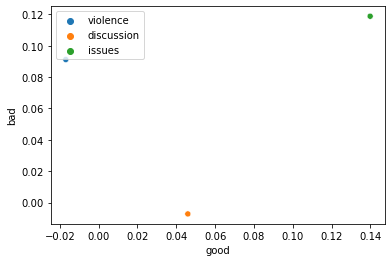

In [19]:
sns.scatterplot(x='good', y='bad', data=pol_words_sim_2d, hue=pol_words_sim_2d.index)

- violence: less good, more bad
- discussion: less bad, more good
- issues: both bad and good

### Can we do this in an 1D scale?
(bad) --------------------?---- (good)

- First, let's create the vector for *bad-good* scale

In [20]:
scale_bad_good = w2v_mod['good'] - w2v_mod['bad']

- Calculate the cosine similarity score of the word *violence* in the *bad-good* scale 
    - $sim(V(violence), V(bad) - V(good))$

In [21]:
violence_score = cosine_similarity(w2v_mod['violence'], scale_bad_good)
violence_score

-0.14428630471229553

# 2. Sentiment Analysis with NLTK

"The Natural Language Toolkit (NLTK) is a suite of libraries and programs for symbolic and statistical natural language processing for English written in the Python programming language."
for more information see: https://www.nltk.org/

We are going to use NLTK and Spacy to determine if text expresses positive sentiment, negative sentiment, or if it's neutral.

In [ ]:
# adapted from https://github.com/Jcharis/Natural-Language-Processing-Tutorials/blob/master/NLP%20with%20SpaCy-%20Adding%20Extensions%20Attributes%20in%20SpaCy(How%20to%20use%20sentiment%20analysis%20in%20SpaCy).ipynb

In [22]:
import nltk

In [24]:
# !pip install nltk
# !python -m nltk.downloader all

/Users/nathanielmay/opt/anaconda3/lib/python3.8/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/nathanielmay/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/nathanielmay/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/nathanielmay/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/nathanielmay/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |

[nltk_data]    | Downloading package rte to
[nltk_data]    |     /Users/nathanielmay/nltk_data...
[nltk_data]    |   Unzipping corpora/rte.zip.
[nltk_data]    | Downloading package semcor to
[nltk_data]    |     /Users/nathanielmay/nltk_data...
[nltk_data]    | Downloading package senseval to
[nltk_data]    |     /Users/nathanielmay/nltk_data...
[nltk_data]    |   Unzipping corpora/senseval.zip.
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     /Users/nathanielmay/nltk_data...
[nltk_data]    |   Unzipping corpora/sentiwordnet.zip.
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     /Users/nathanielmay/nltk_data...
[nltk_data]    |   Unzipping corpora/sentence_polarity.zip.
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     /Users/nathanielmay/nltk_data...
[nltk_data]    |   Unzipping corpora/shakespeare.zip.
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     /Users/nathanielmay/nltk_data.

In [25]:
import nltk

"VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media."

for more see: https://github.com/cjhutto/vaderSentiment

In [26]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nathanielmay/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
!pip3 install twython

We are going to extend the spacy functionality with the SentimentIntensityAnalyzer function from NLTK.

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

def sentiment_scores(docx):
    return sent_analyzer.polarity_scores(docx.text)

In [29]:
import spacy

In [ ]:
# ! python -m spacy download en

In [31]:
# loading up the language model: English
nlp = spacy.load('en_core_web_sm')

In [33]:
from spacy.tokens import Doc
Doc.set_extension("sentimenter",getter=sentiment_scores)

In [34]:
nlp("This movie was very nice")._.sentimenter

{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'compound': 0.4754}

Let's apply this sentiment analysis to product reviews on Amazon

In [35]:
r = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/small_reviews.csv')
#random sample of original dataset at https://www.kaggle.com/snap/amazon-fine-food-reviews

In [36]:
r.head()

,Unnamed: 0,Score,Summary,Text
0,244509,4,Love Happy Tot,I just love the happy tot baby food line. It s...
1,87295,4,Feelin Hot Hot Hot,Curry has become one of my favorite foods over...
2,377094,5,Wow. Very Maple-y,"Just tried this for the first time, and I'm qu..."
3,44261,4,"Good dark, rich coffee for breakfast time",After trying lots of different blends in K-Cup...
4,398439,5,Fantastic coffee!,"Exceptional coffee all around - rich, full, wi..."


We'll use the apply function to transform text with spacy's nlp function.

In [37]:
r['rating'] = r['Text'].apply(lambda x: nlp(x)._.sentimenter['compound'])

In [38]:
r[['Score','rating','Text']].head(10)

,Score,rating,Text
0,4,0.9558,I just love the happy tot baby food line. It s...
1,4,0.9742,Curry has become one of my favorite foods over...
2,5,0.9383,"Just tried this for the first time, and I'm qu..."
3,4,0.8476,After trying lots of different blends in K-Cup...
4,5,0.5983,"Exceptional coffee all around - rich, full, wi..."
5,5,0.9652,These are a delicious vegan alternative to reg...
6,1,-0.6048,I have never cared for sweetened cereal as I w...
7,3,0.8029,I've been looking for dried organic mango that...
8,3,-0.1971,"This meal-in-a-box was alright, but not amazin..."
9,4,0.2732,This product works well with most kinds of mea...


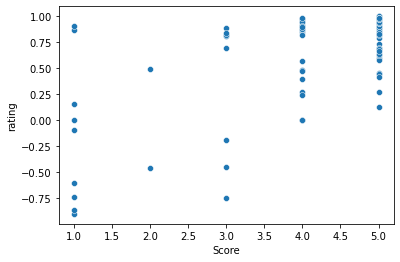

In [39]:
sns.scatterplot(x='Score',y='rating',data=r)

In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [41]:
model0 = smf.ols("rating ~ Score ", data=r)
model0.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     75.94
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           7.42e-14
Time:                        21:21:19   Log-Likelihood:                -36.472
No. Observations:                 100   AIC:                             76.94
Df Residuals:                      98   BIC:                             82.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3822      0.125     -3.057      0.003      -0.630      -0.134
Score          0.2483      0.028      8.714      0.000       0.192       0.305
==============================================================================
Omnibus:                        8.414   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               10.382
Skew:                          -0.438   Prob(JB):                      0.00557
Kurtosis:                       4.313   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""